In [1]:
%matplotlib widget

In [2]:
import he_burn_core

In [3]:
import pynucastro as pyna

Adding nuclei based on https://ui.adsabs.harvard.edu/abs/2018ApJ...854...52S/abstract

In [4]:
lib = he_burn_core.get_core_library(include_n14_sequence=True,
                                    include_zn=True,
                                    include_iron_peak=True,
                                    include_low_ye=False,
                                    do_detailed_balance=False,
                                    extra_nuclei=["o17", "f19", "ne22", "mg23"])

removing:  p31(p,c12)ne20
removing:  si28(a,c12)ne20
removing:  ne20(c12,p)p31
removing:  ne20(c12,a)si28
removing:  na23(a,g)al27
removing:  al27(g,a)na23
removing:  al27(a,g)p31
removing:  p31(g,a)al27


In [5]:
net = pyna.AmrexAstroCxxNetwork(libraries=[lib], symmetric_screening=False)

In [6]:
net.make_ap_pg_approx(intermediate_nuclei=["cl35", "k39", "sc43", "v47"])
net.remove_nuclei(["cl35", "k39", "sc43", "v47"])

using approximate rate S32 + He4 ⟶ Ar36 + 𝛾
using approximate rate Ar36 ⟶ S32 + He4
using approximate rate Ar36 + He4 ⟶ Ca40 + 𝛾
using approximate rate Ca40 ⟶ Ar36 + He4
using approximate rate Ca40 + He4 ⟶ Ti44 + 𝛾
using approximate rate Ti44 ⟶ Ca40 + He4
using approximate rate Ti44 + He4 ⟶ Cr48 + 𝛾
using approximate rate Cr48 ⟶ Ti44 + He4
removing rate S32 + He4 ⟶ Ar36 + 𝛾
removing rate S32 + He4 ⟶ p + Cl35
removing rate Cl35 + p ⟶ Ar36 + 𝛾
removing rate Ar36 ⟶ He4 + S32
removing rate Ar36 ⟶ p + Cl35
removing rate Cl35 + p ⟶ He4 + S32
removing rate Ar36 + He4 ⟶ Ca40 + 𝛾
removing rate Ar36 + He4 ⟶ p + K39
removing rate K39 + p ⟶ Ca40 + 𝛾
removing rate Ca40 ⟶ He4 + Ar36
removing rate Ca40 ⟶ p + K39
removing rate K39 + p ⟶ He4 + Ar36
removing rate Ca40 + He4 ⟶ Ti44 + 𝛾
removing rate Ca40 + He4 ⟶ p + Sc43
removing rate Sc43 + p ⟶ Ti44 + 𝛾
removing rate Ti44 ⟶ He4 + Ca40
removing rate Ti44 ⟶ p + Sc43
removing rate Sc43 + p ⟶ He4 + Ca40
removing rate Ti44 + He4 ⟶ Cr48 + 𝛾
removing rate Ti44

In [7]:
net.make_nn_g_approx(intermediate_nuclei=["fe53", "fe55", "ni57"])
net.remove_nuclei(["fe53", "fe55", "ni57"])

approximating out Fe53
using approximate rate Fe52 + n + n ⟶ Fe54 + 𝛾
using approximate rate Fe54 ⟶ Fe52 + n + n
approximating out Fe55
using approximate rate Fe54 + n + n ⟶ Fe56 + 𝛾
using approximate rate Fe56 ⟶ Fe54 + n + n
approximating out Ni57
using approximate rate Ni56 + n + n ⟶ Ni58 + 𝛾
using approximate rate Ni58 ⟶ Ni56 + n + n
removing rate Fe52 + n ⟶ Fe53 + 𝛾
removing rate Fe53 + n ⟶ Fe54 + 𝛾
removing rate Fe54 ⟶ n + Fe53
removing rate Fe53 ⟶ n + Fe52
removing rate Fe54 + n ⟶ Fe55 + 𝛾
removing rate Fe55 + n ⟶ Fe56 + 𝛾
removing rate Fe56 ⟶ n + Fe55
removing rate Fe55 ⟶ n + Fe54
removing rate Ni56 + n ⟶ Ni57 + 𝛾
removing rate Ni57 + n ⟶ Ni58 + 𝛾
removing rate Ni58 ⟶ n + Ni57
removing rate Ni57 ⟶ n + Ni56
looking to remove Ni57 ⟶ He4 + Fe53
looking to remove Fe53 + He4 ⟶ Ni57 + 𝛾
looking to remove Fe53 + He4 ⟶ n + Ni56
looking to remove Fe53 + He4 ⟶ p + Co56
looking to remove Co56 + p ⟶ He4 + Fe53
looking to remove Ni56 + n ⟶ He4 + Fe53
looking to remove Co56 ⟶ p + Fe55
looking

In [8]:
net.make_nse_protons(48)

modifying p_Mn51__Fe52 to use NSE protons
modifying Fe52__p_Mn51 to use NSE protons
modifying p_Co55__Ni56 to use NSE protons
modifying Ni56__p_Co55 to use NSE protons
modifying p_Cu59__Zn60 to use NSE protons
modifying Zn60__p_Cu59 to use NSE protons
modifying He4_Cr48__p_Mn51 to use NSE protons
modifying p_Mn51__He4_Cr48 to use NSE protons
modifying He4_Fe52__p_Co55 to use NSE protons
modifying p_Co55__He4_Fe52 to use NSE protons
modifying p_Cu59__He4_Ni56 to use NSE protons
modifying He4_Ni56__p_Cu59 to use NSE protons
modifying p_Fe54__Co55 to use NSE protons
modifying Co55__p_Fe54 to use NSE protons
modifying p_Fe56__Co57 to use NSE protons
modifying Co57__p_Fe56 to use NSE protons
modifying p_Co57__Ni58 to use NSE protons
modifying Ni58__p_Co57 to use NSE protons
modifying p_Ni58__Cu59 to use NSE protons
modifying Cu59__p_Ni58 to use NSE protons
modifying He4_Mn51__p_Fe54 to use NSE protons
modifying p_Fe54__He4_Mn51 to use NSE protons
modifying He4_Co55__p_Ni58 to use NSE proton

In [9]:
comp = pyna.Composition(net.unique_nuclei)
comp.set_equal()

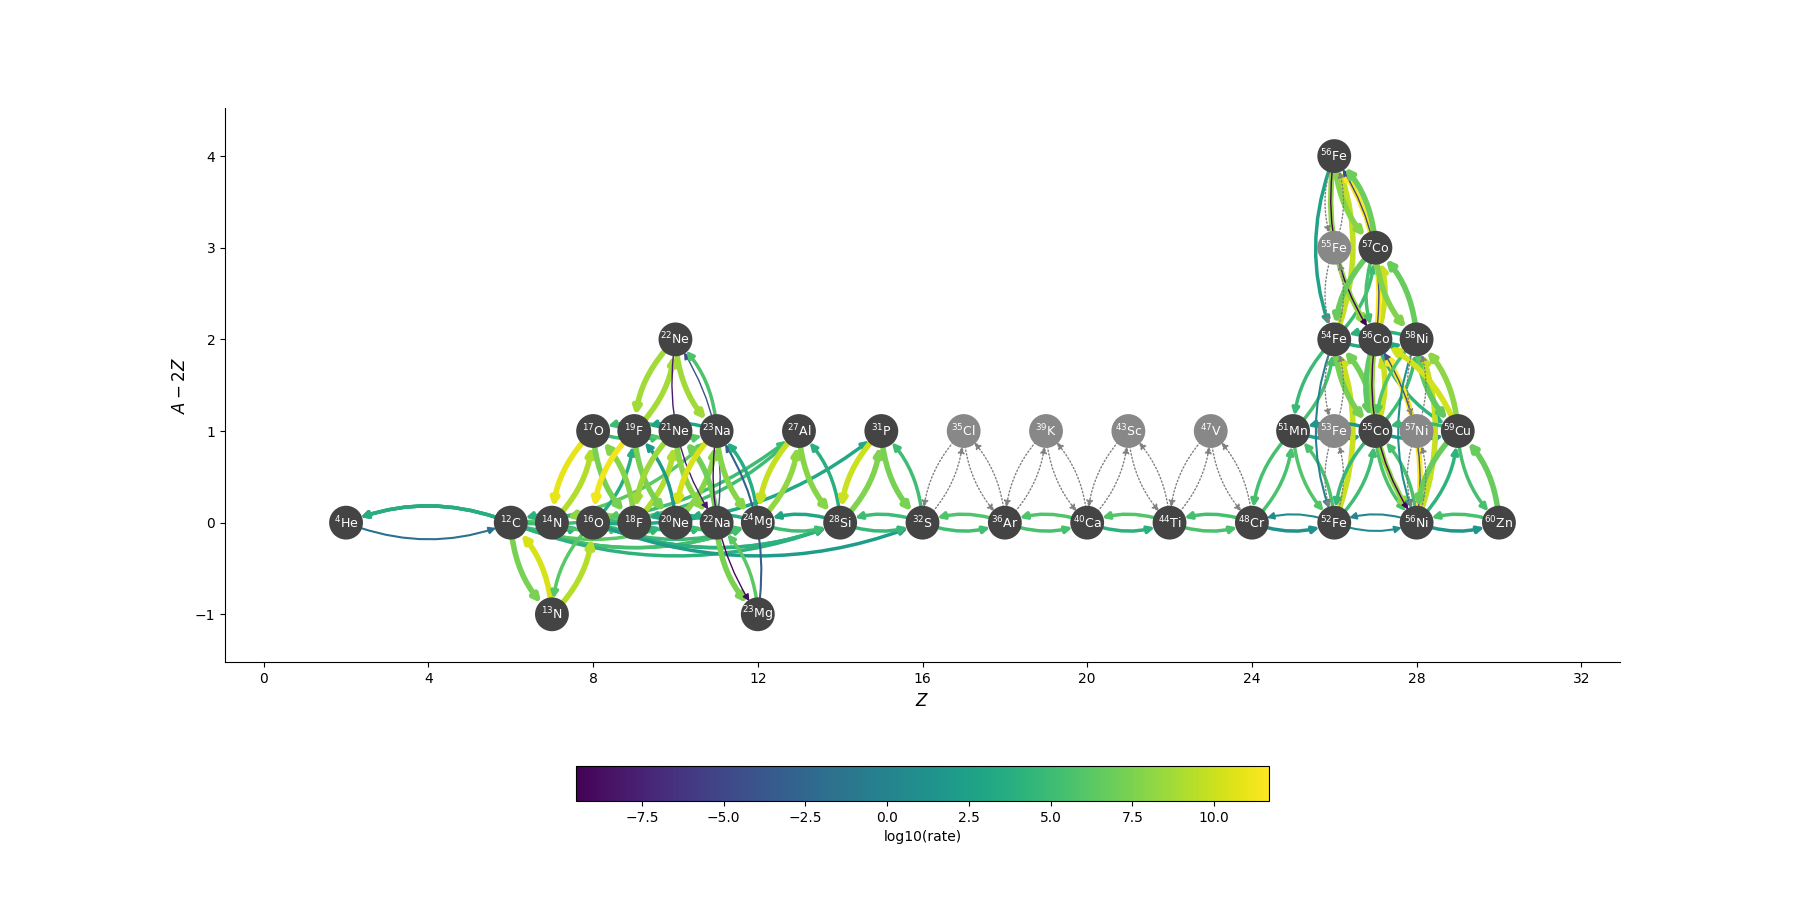

In [10]:
rho = 9.e7
T = 6.e9

fig = net.plot(rho, T, comp,
               rotated=True, curved_edges=True, hide_xalpha=True,
               size=(1800, 900), node_size=500, node_font_size=9)
fig.savefig("new-he-net.png", bbox_inches="tight")

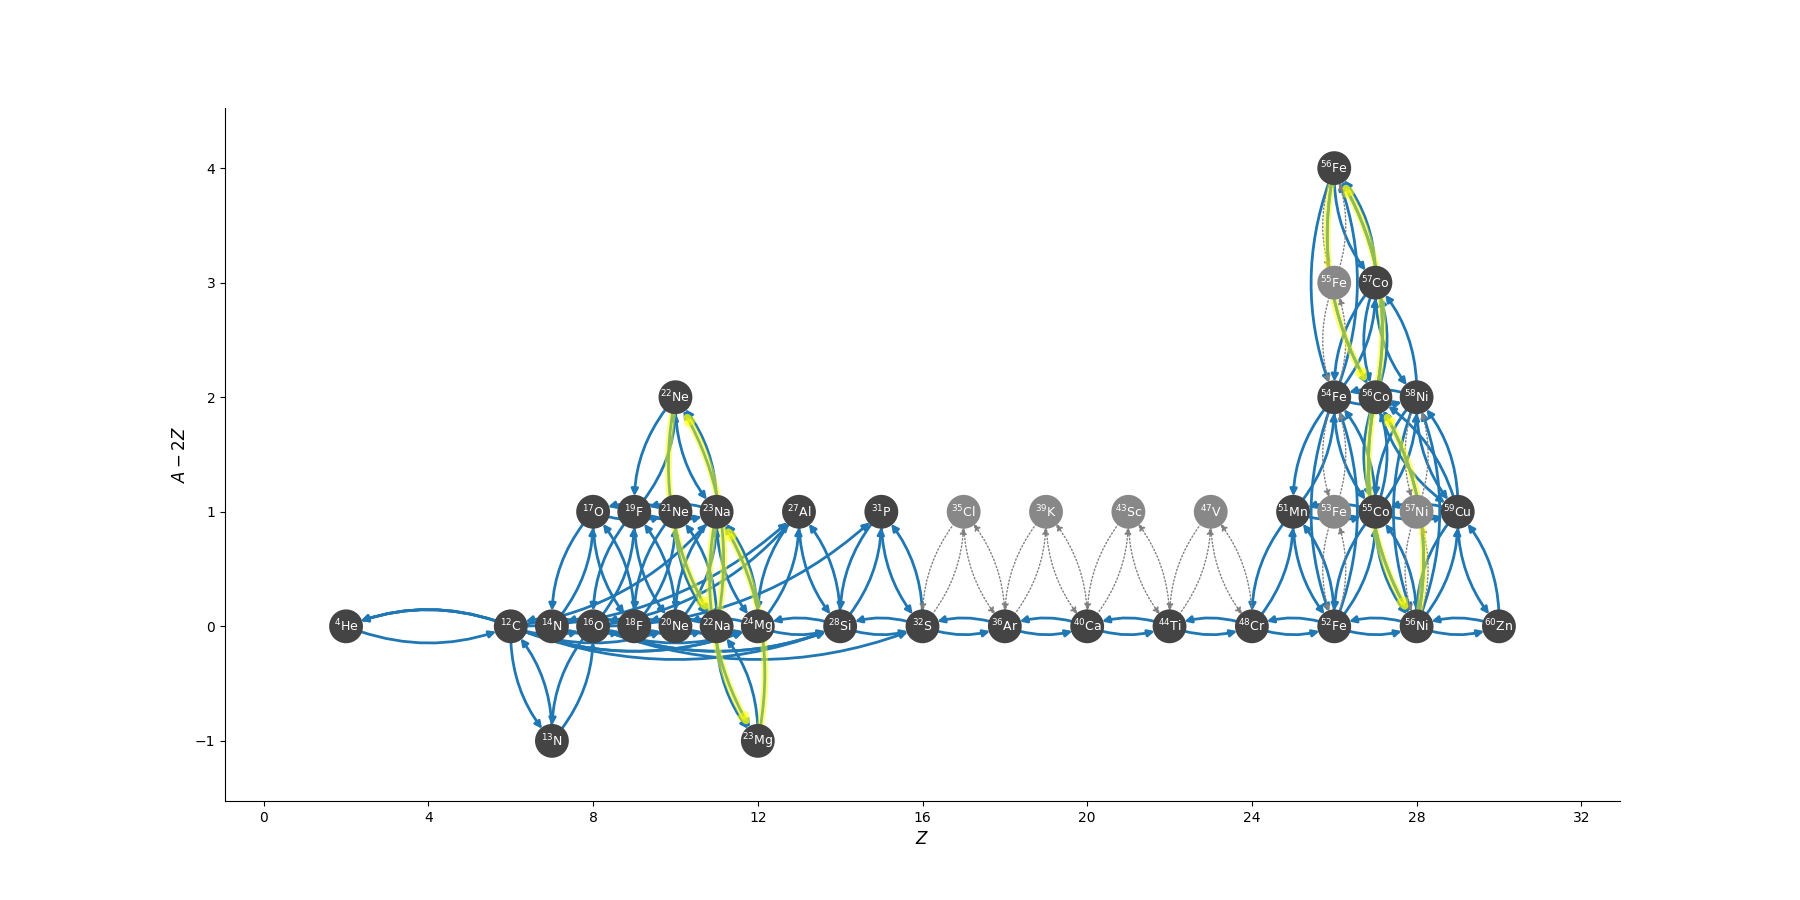

In [11]:
fig = net.plot(rotated=True, curved_edges=True, hide_xalpha=True,
               size=(1800, 900), node_size=500, node_font_size=9,
               highlight_filter_function=lambda r: isinstance(r, pyna.rates.TabularRate))

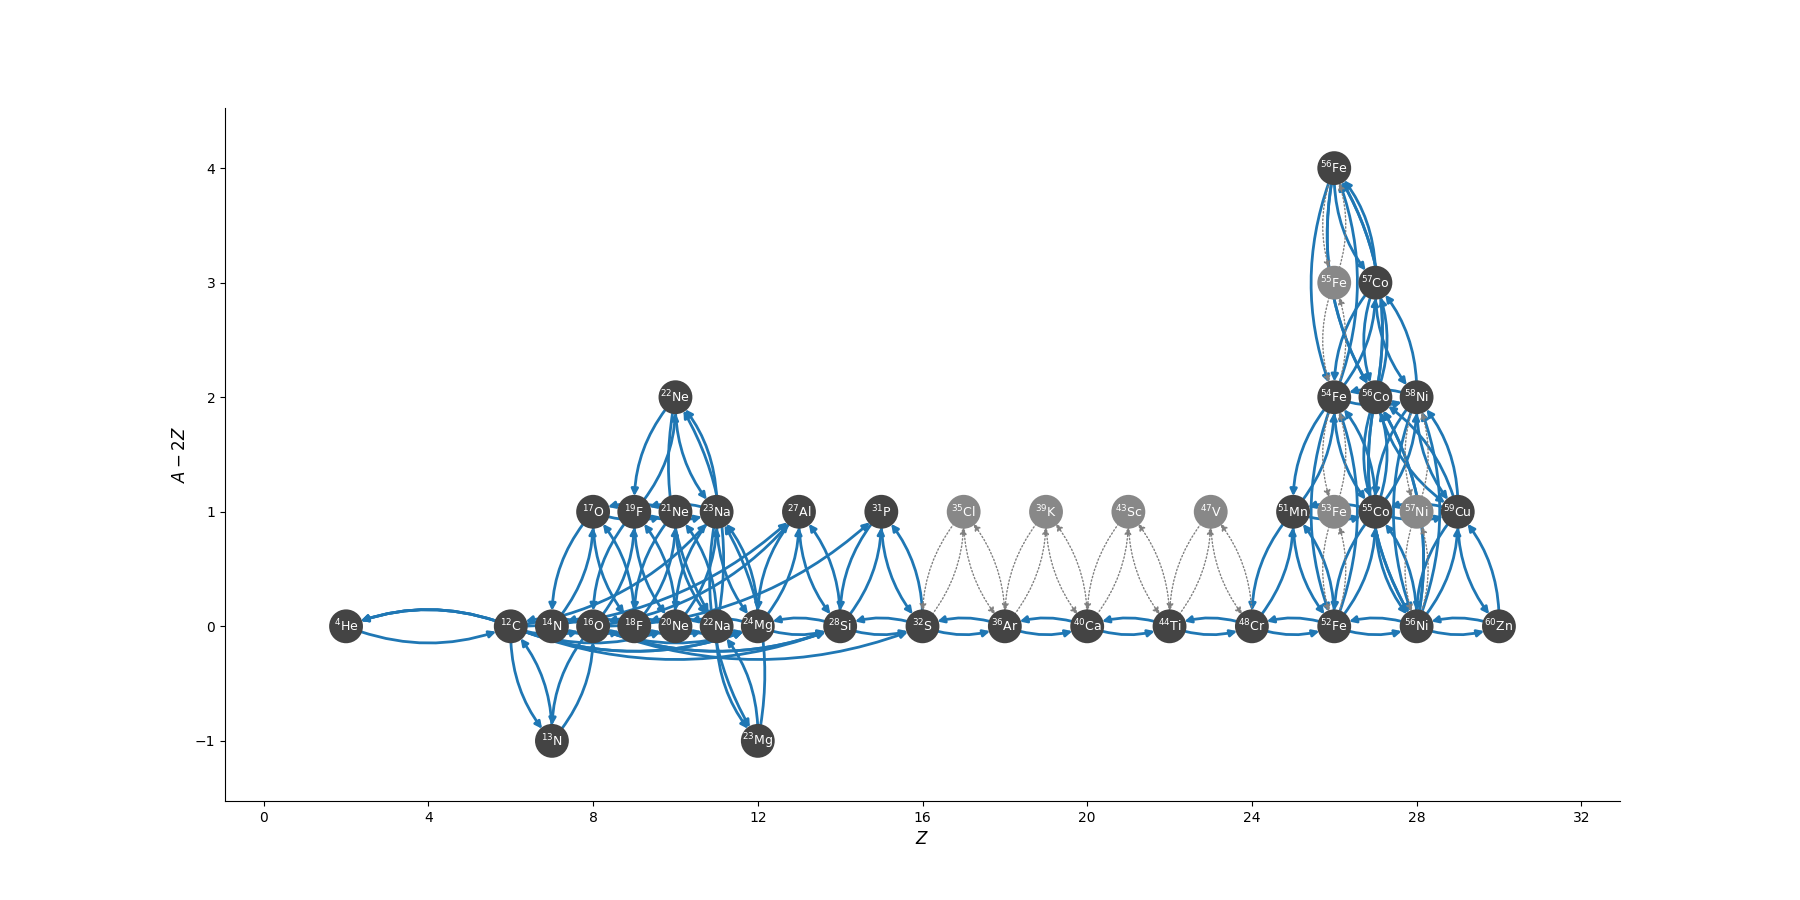

In [12]:
fig = net.plot(rotated=True, curved_edges=True, hide_xalpha=True,
               size=(1800, 900), node_size=500, node_font_size=9,
               highlight_filter_function=lambda r: isinstance(r, pyna.rates.DerivedRate))

In [13]:
len(net.unique_nuclei)

37

In [14]:
len(net.get_rates())

135

In [15]:
len(net.reaclib_rates)

147

In [16]:
len(net.derived_rates)

0

In [17]:
len(net.tabular_rates)

10

In [18]:
net.write_network()

In [19]:
127 + 36

163

In [20]:
len(net.get_hidden_rates())

36